In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import pandas as pd
%config InlineBackend.figure_format = 'retina'

In [44]:
class CouponCollector():
    
    def __init__(self, N=100):  
        self.N = N
        self.collection = [False for i in range(N)]
        self.iter = 0

    def sample(self):
        s = np.random.randint(self.N)
        self.collection[s] = self.collection[s] or True
        self.iter += 1

    def count(self):
        return np.sum(self.collection)

    def countPr(self):
        return self.count() / self.N


In [132]:
# Collection sizes
Collections = [10, 50, 100, 200, 300, 400, 500, 1000]

# Number of trials for each case
N = 200

# Save the results
R = np.zeros((len(Collections), N))

i = 0

for c in Collections:
    print("Tamaño:", c)
    for n in range(N):
        collector = CouponCollector(c)
        while collector.countPr() != 1.0:
            collector.sample()
        R[i, n] = collector.iter
    i += 1
    

Tamaño: 10
Tamaño: 50
Tamaño: 100
Tamaño: 200
Tamaño: 300
Tamaño: 400
Tamaño: 500
Tamaño: 1000


In [136]:
C = np.arange(-6, 7)
P = np.zeros((len(C), len(Collections)))

In [137]:
j = 0
for c in C:
    i = 0
    for n in Collections:
        #print(c, "--", n, "--", n*np.log(n) + c*n)
        P[j, i] = np.sum(R[i] < n*np.log(n) + c*n) / N
        i+=1
    j += 1
        

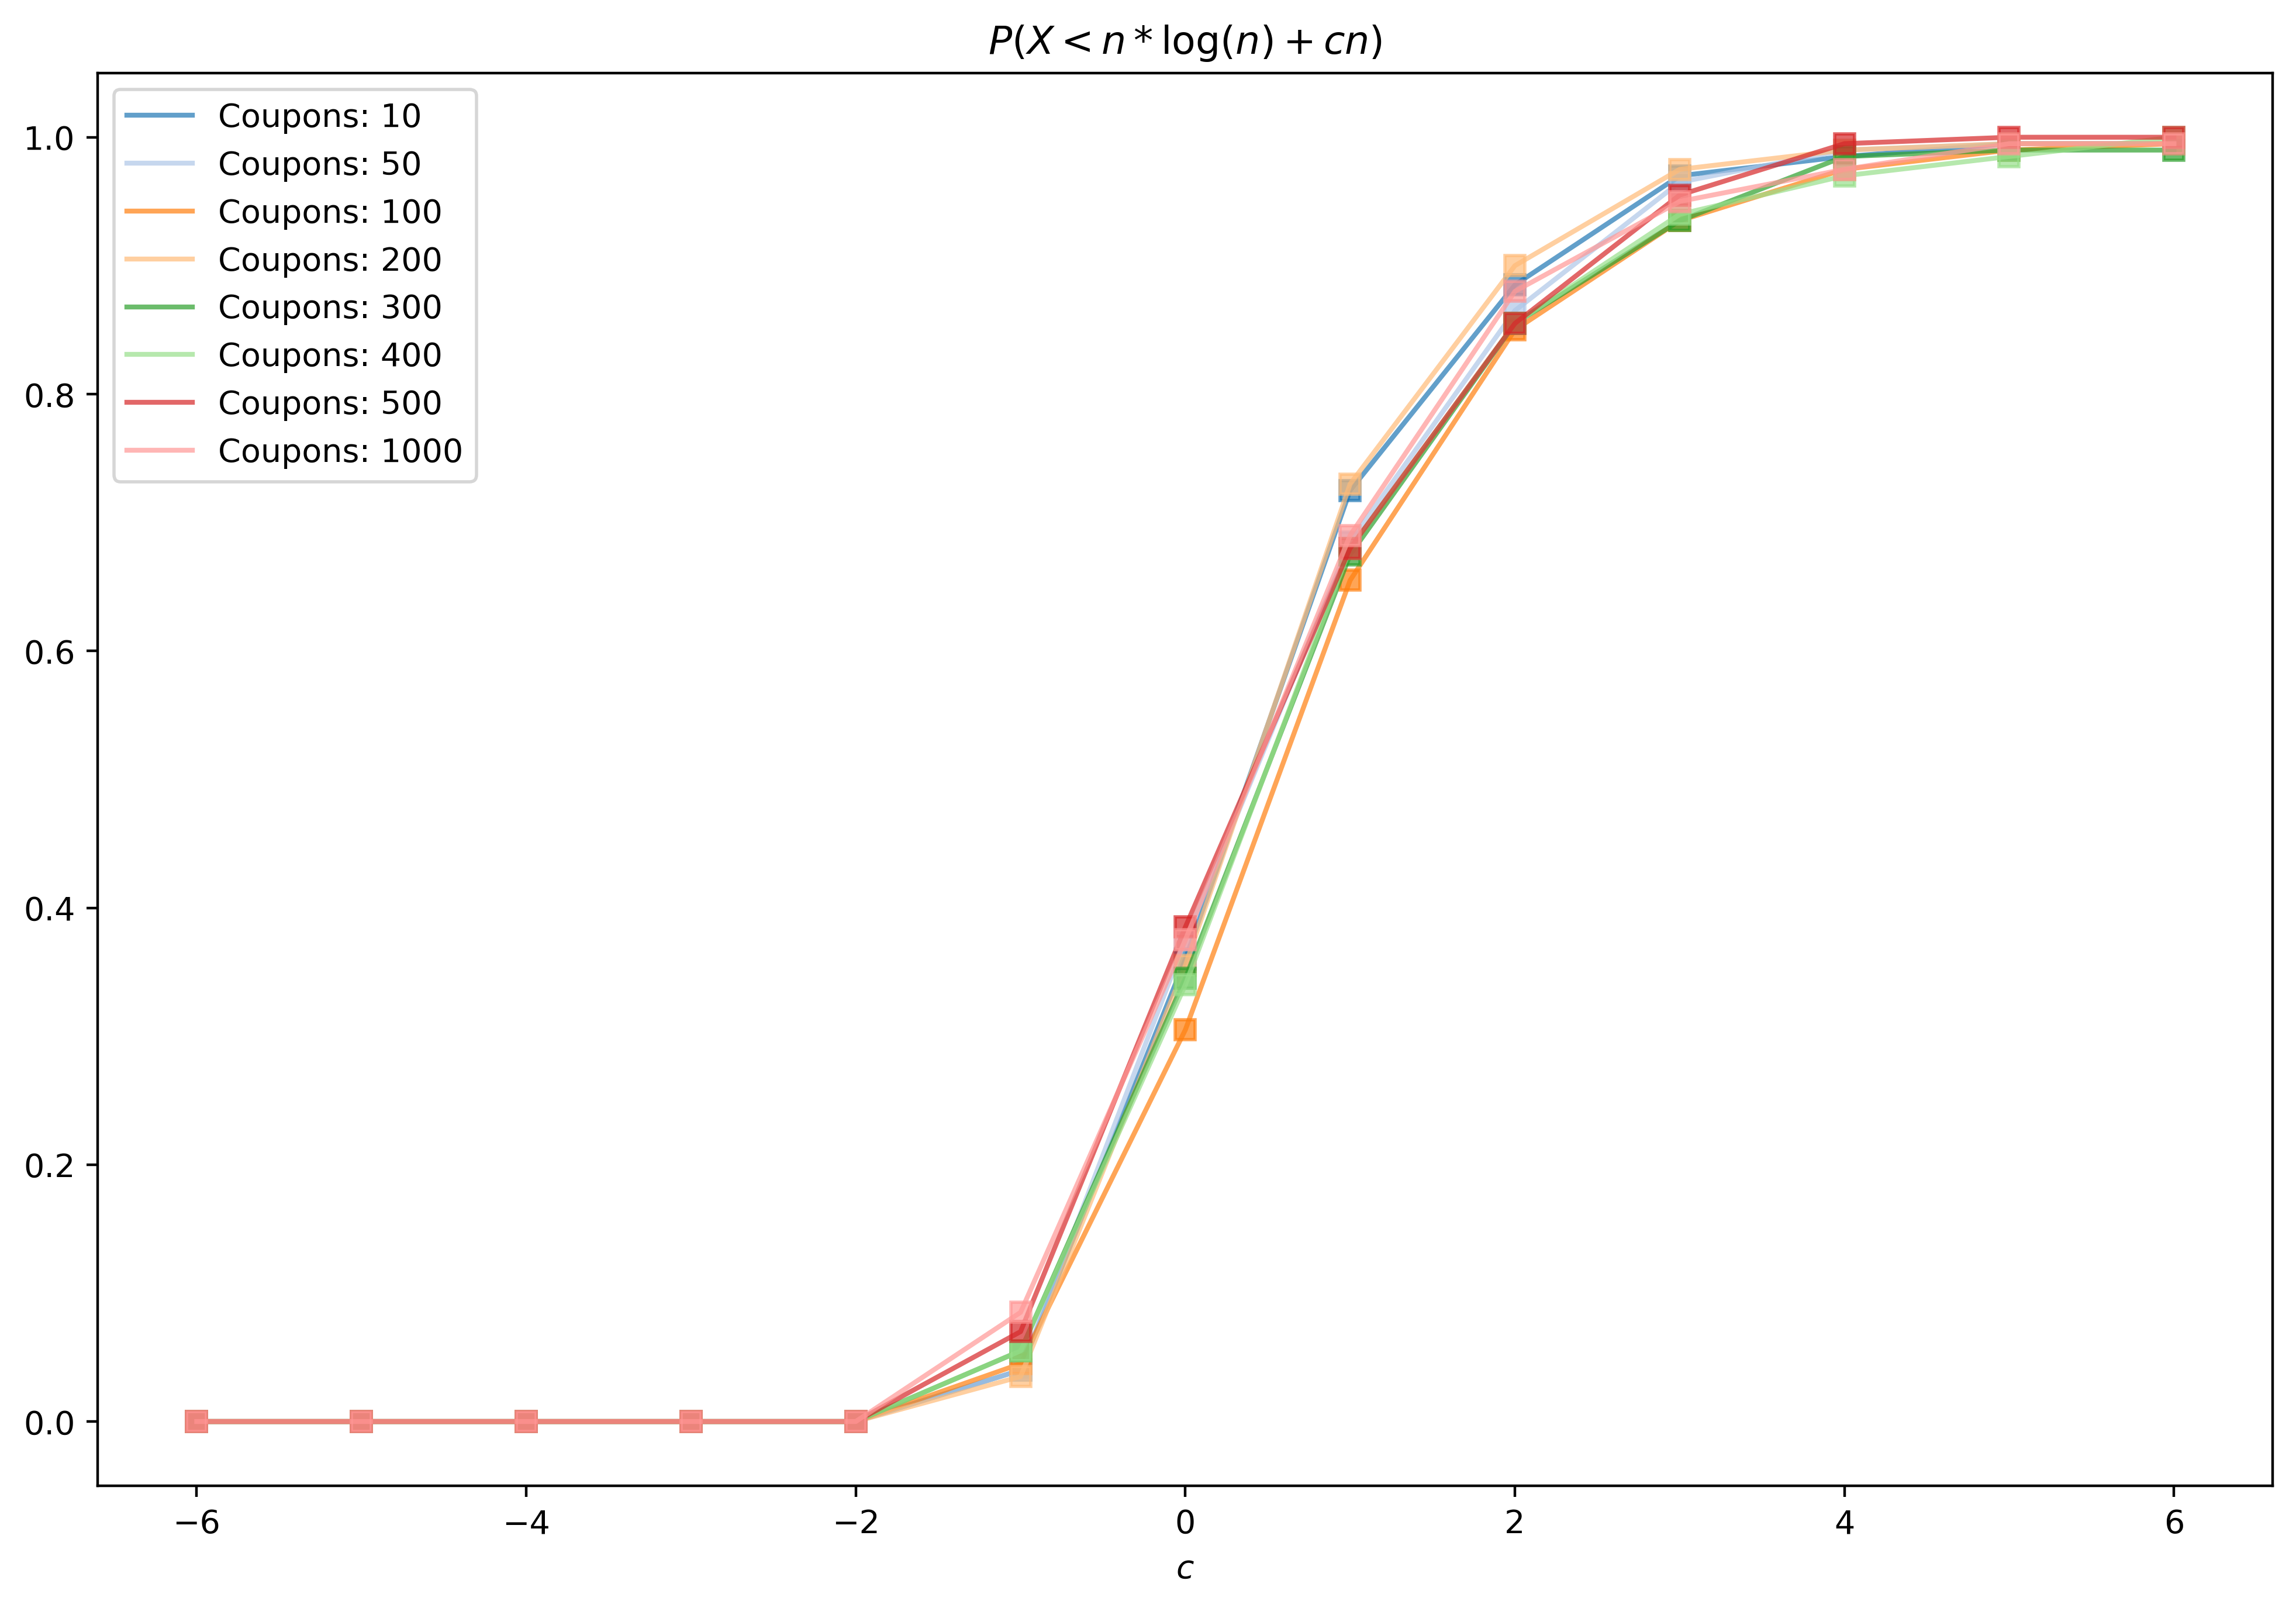

In [148]:
plt.figure(figsize=(12, 8), dpi=200)
cm = plt.cm.tab20
for i in range(len(Collections)):
    plt.plot(C, P[:, i], label="Coupons: "+str(Collections[i]), color=cm(i), alpha=0.7)
    plt.plot(C, P[:, i], "s", color=cm(i), alpha=0.7)

plt.xlabel("$c$")
plt.title("$P(X<n*\log(n)+cn)$")
plt.legend()